In [1]:
import pandas as pd
import numpy as np 


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Preprocessed_data.csv")

In [3]:
df.head()

Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score  Point Earned  \
0        101348.88       1         1                   2           464   
1        112542.58       0         1                   3           456   
2        113931.57       1         1                   3           377   
3         93826.63       0         0                   5           350   
4         79084.10       0         0                   5           425   

   Geography_Germany  Geography_Spain  Gender_Male  Card Type_GOLD  \
0                0.0              0.0          0.0             0.0   
1                0.0              1.0          0.0             0.0   
2                0.0              0.0          0.0             0.0   
3                0.0              0.0          0.0             1.0   
4                0.0              1.0          0.0             1.0   

   Card Type_PLATINUM  Card Type_SILVER  
0                 0.0               0.0  
1                 0.0               0.0  
2                 0.0               0.0  
3                 0.0               0.0  
4                 0.0               0.0

In [ ]:
# Features and target

X = df.drop(columns=['Exited']) 
y = df['Exited']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Logistic Regression model
log_reg = LogisticRegression(penalty='l1',random_state=42,solver='saga',l1_ratio= 1,max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [30]:
y_pred = log_reg.predict(X_test_scaled)

log_loss(y_test,y_pred_prob)

0.007169159490694661

In [29]:
print("Logistic Regression Results:")
print("Traning_model_accurcy = " , log_reg.score(X_train_scaled,y_train))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Traning_model_accurcy =  0.9985
Accuracy: 0.999
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [33]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[6355 1645]
[1607  393]


In [35]:
# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Perform stratified cross validation
scores = cross_val_score(log_reg, X, y, cv=skf, scoring='f1')

# Print the accuracy for each fold
print("f1_score for each fold: ", scores)
print("Mean accuracy across all folds: ", scores.mean())

C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

f1_score for each fold:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean accuracy across all folds:  0.0


C:\Program Files\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
## Adjusting the class weights 

model = LogisticRegression(class_weight='balanced')

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Perform stratified cross validation
scores = cross_val_score(model, X, y, cv=skf, scoring='f1')

# Print the accuracy for each fold
print("f1_score for each fold: ", scores)
print("Mean f1_score across all folds: ", scores.mean())

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

f1_score for each fold:  [0.9902439  1.         0.99014778 0.99755501 1.         0.68103448
 0.99509804 0.99019608 0.99509804 0.99753086]
Mean accuracy across all folds:  0.9636904201734092


C:\Program Files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


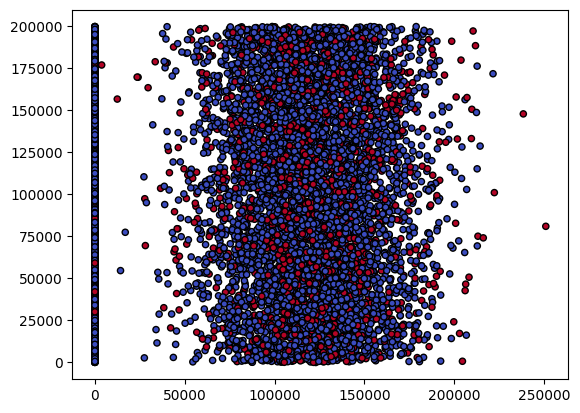

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 
# sns.scatterplot(x = df['Balance'],y = df['Exited'])
plt.scatter(X['Balance'], X['EstimatedSalary'], c=y, edgecolors='k', marker='o', s=20, cmap='coolwarm')


<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

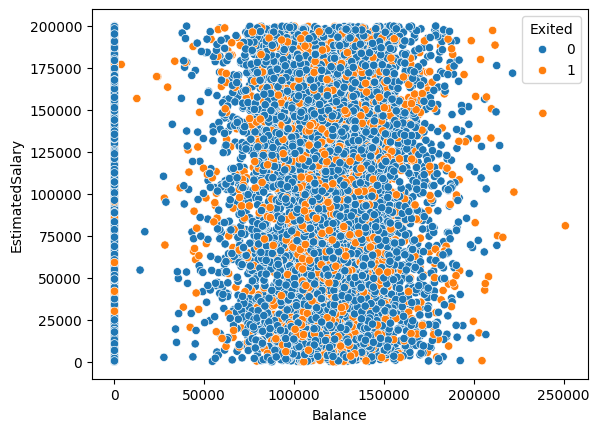

In [34]:
sns.scatterplot(x = df['Balance'] , y = df['EstimatedSalary'] , hue=df['Exited'])

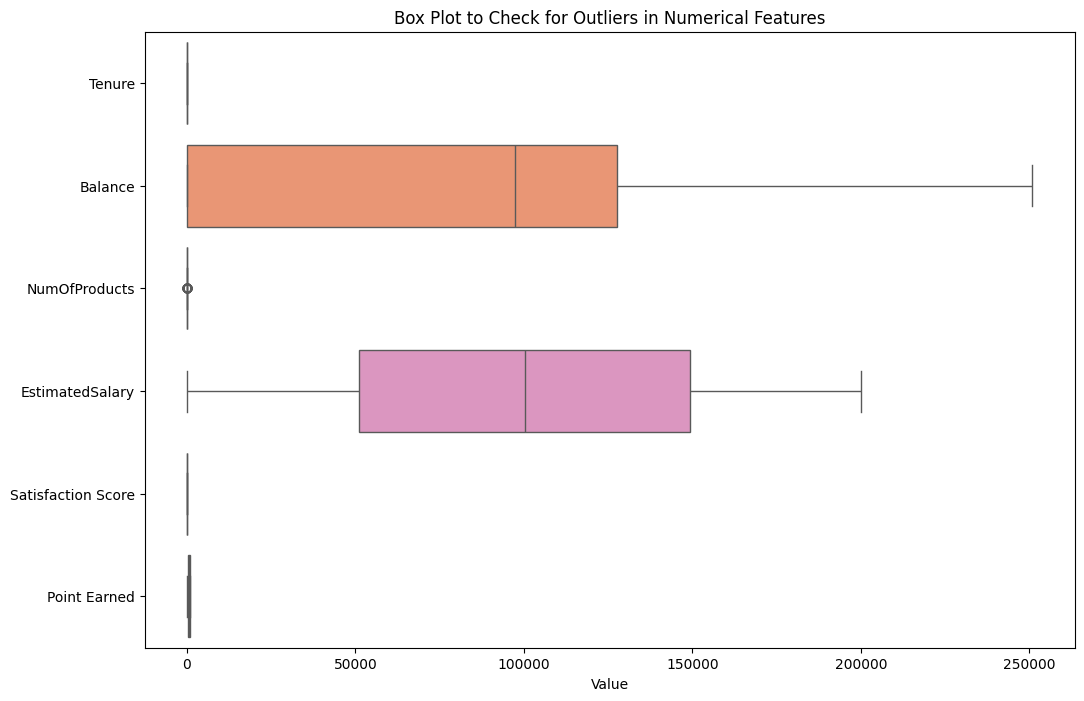

In [19]:
# Select the numerical columns from your dataset
numerical_columns = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Create a boxplot for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')

plt.title('Box Plot to Check for Outliers in Numerical Features')
plt.xlabel('Value')
plt.show()

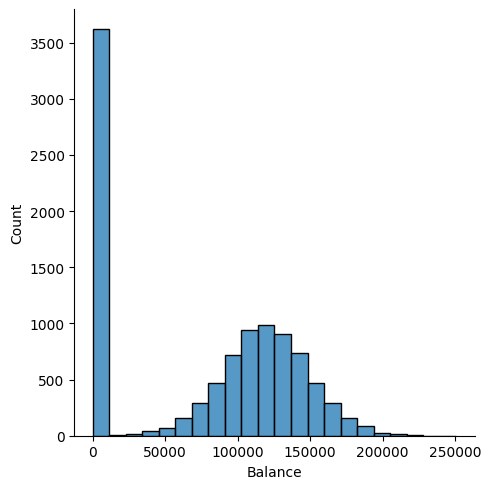

In [32]:
sns.displot(df['Balance'])